In [8]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
# Data sampel: Electric_production.csv
# Lượng điện sản xuất
data = pd.read_csv('Electric_production.csv')
data.head(10)


,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
5,6/1/1985,58.0904
6,7/1/1985,62.6202
7,8/1/1985,63.2485
8,9/1/1985,60.5846
9,10/1/1985,56.3154


In [9]:
#get time series data
def get_data():
    data = pd.read_csv('Electric_production.csv')
    data['DATE'] = pd.to_datetime(data['DATE'])
    data = data.set_index('DATE')
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    data['Day'] = data.index.day
    return data
data = get_data()
data.head(15)

    


,IPG2211A2N,Year,Month,Day
DATE,,,,
1985-01-01,72.5052,1985,1,1
1985-02-01,70.6720,1985,2,1
1985-03-01,62.4502,1985,3,1
1985-04-01,57.4714,1985,4,1
1985-05-01,55.3151,1985,5,1
1985-06-01,58.0904,1985,6,1
1985-07-01,62.6202,1985,7,1
1985-08-01,63.2485,1985,8,1
1985-09-01,60.5846,1985,9,1


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

(361, 4)
(36, 4)
[104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243]


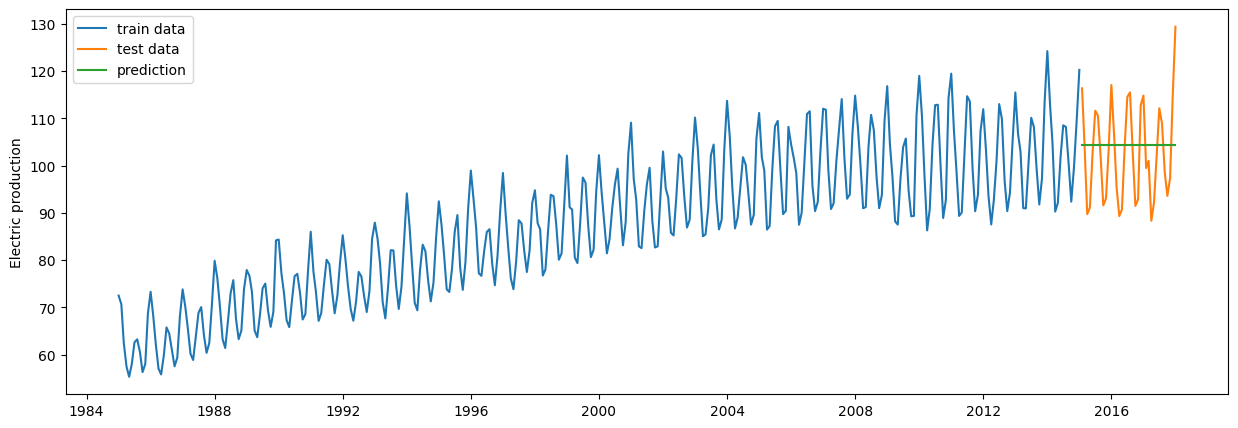

In [31]:
# time series data to KNN:
def get_data():
        data = pd.read_csv('Electric_production.csv')
        data['DATE'] = pd.to_datetime(data['DATE'])
        data = data.set_index('DATE')
        data['Year'] = data.index.year
        data['Month'] = data.index.month
        data['Day'] = data.index.day
        return data
data = get_data()
data.head(15)

# Split data to train and test
def split_data(data, split_date):
        return data.loc[data.index <= split_date].copy(), \
                   data.loc[data.index >  split_date].copy()
train, test = split_data(data, '01-01-2015')
print(train.shape)
print(test.shape)

# KNN
def knn(train, test, n_neighbors):
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
        X = train.index.values.reshape(-1, 1)
        y = train['IPG2211A2N'].ravel()
        knn.fit(X, y)
        # Predicting
        X = test.index.values.reshape(-1, 1)
        return knn.predict(X), knn
y_pred, knn = knn(train, test, 5)
print(y_pred)

# Plot
def plot_knn(y_pred, knn, train, test):
        plt.figure(figsize=(15, 5))
        plt.plot(train.index, train['IPG2211A2N'], label='train data')
        plt.plot(test.index, test['IPG2211A2N'], label='test data')
        plt.plot(test.index, y_pred, label='prediction')
        plt.ylabel('Electric production')
        plt.legend()
        plt.show()
plot_knn(y_pred, knn, train, test)








In [34]:
#scaling time series data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['IPG2211A2N'] = scaler.fit_transform(data['IPG2211A2N'].values.reshape(-1,1))
data.head(15)




,IPG2211A2N,Year,Month,Day
DATE,,,,
1985-01-01,0.232017,1985,1,1
1985-02-01,0.207274,1985,2,1
1985-03-01,0.096304,1985,3,1
1985-04-01,0.029104,1985,4,1
1985-05-01,0.000000,1985,5,1
1985-06-01,0.037459,1985,6,1
1985-07-01,0.098598,1985,7,1
1985-08-01,0.107078,1985,8,1
1985-09-01,0.071123,1985,9,1


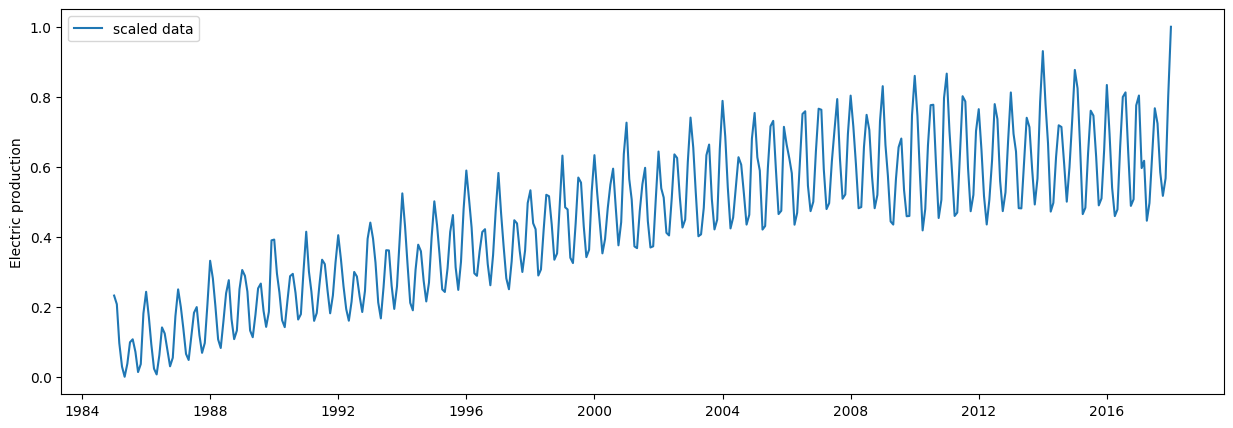

In [36]:
# visualize scaled data
plt.figure(figsize=(15, 5))
plt.plot(data['IPG2211A2N'], label='scaled data')
plt.ylabel('Electric production')
plt.legend()
plt.show()



(361, 4)
(36, 4)
[104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243]


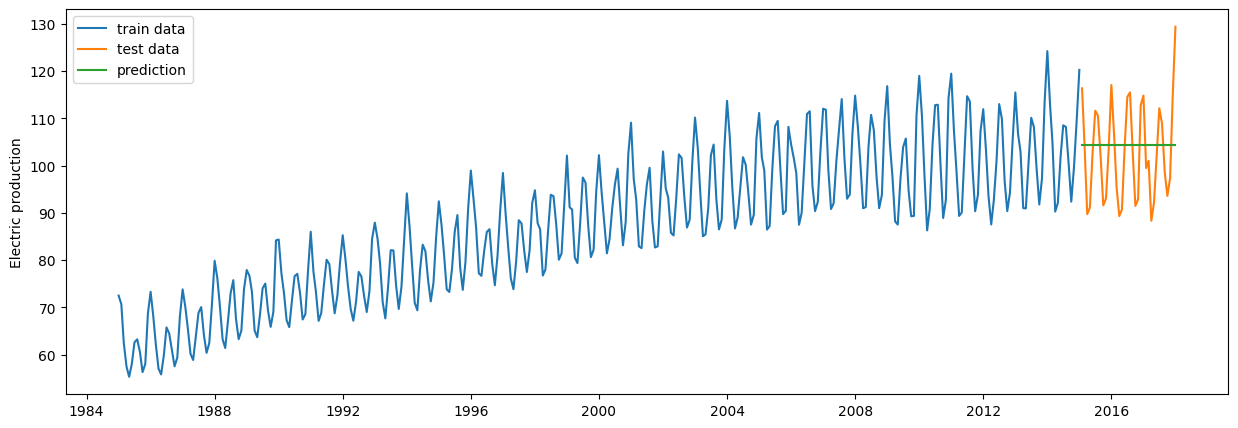

In [45]:
# time series data for KNN model using hyper-parameter tuning
def get_data():
        data = pd.read_csv('Electric_production.csv')
        data['DATE'] = pd.to_datetime(data['DATE'])
        data = data.set_index('DATE')
        data['Year'] = data.index.year
        data['Month'] = data.index.month
        data['Day'] = data.index.day
        return data
data = get_data()
data.head(15)

# Split data to train and test
def split_data(data, split_date):
        return data.loc[data.index <= split_date].copy(), \
                   data.loc[data.index >  split_date].copy()
train, test = split_data(data, '01-01-2015')
print(train.shape)
print(test.shape)

# KNN
def knn(train, test, n_neighbors):
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
        X = train.index.values.reshape(-1, 1)
        y = train['IPG2211A2N'].ravel()
        knn.fit(X, y)
        # Predicting
        X = test.index.values.reshape(-1, 1)
        return knn.predict(X), knn
y_pred, knn = knn(train, test, 5)
print(y_pred)

# Plot
def plot_knn(y_pred, knn, train, test):
        plt.figure(figsize=(15, 5))
        plt.plot(train.index, train['IPG2211A2N'], label='train data')
        plt.plot(test.index, test['IPG2211A2N'], label='test data')
        plt.plot(test.index, y_pred, label='prediction')
        plt.ylabel('Electric production')
        plt.legend()
        plt.show()
plot_knn(y_pred, knn, train, test)




(361, 4)
(36, 4)
[104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243]


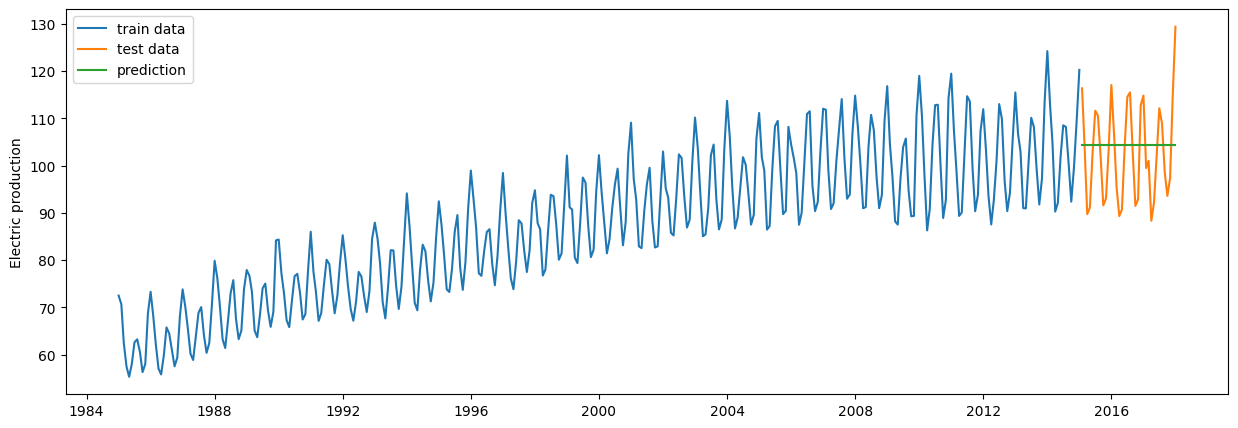

In [46]:
#time series data KNN model using pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

# time series data to KNN:
def get_data():
        data = pd.read_csv('Electric_production.csv')
        data['DATE'] = pd.to_datetime(data['DATE'])
        data = data.set_index('DATE')
        data['Year'] = data.index.year
        data['Month'] = data.index.month
        data['Day'] = data.index.day
        return data
data = get_data()
data.head(15)

# Split data to train and test
def split_data(data, split_date):
        return data.loc[data.index <= split_date].copy(), \
                   data.loc[data.index >  split_date].copy()
train, test = split_data(data, '01-01-2015')
print(train.shape)
print(test.shape)

# KNN
def knn(train, test, n_neighbors):
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
        X = train.index.values.reshape(-1, 1)
        y = train['IPG2211A2N'].ravel()
        knn.fit(X, y)
        # Predicting
        X = test.index.values.reshape(-1, 1)
        return knn.predict(X), knn

# Pipeline
def pipeline_knn(train, test, n_neighbors):
        pipeline = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsRegressor())])
        parameters = {'knn__n_neighbors': n_neighbors}
        grid = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
        X = train.index.values.reshape(-1, 1)
        y = train['IPG2211A2N'].ravel()
        grid.fit(X, y)
        # Predicting
        X = test.index.values.reshape(-1, 1)
        y_pred = grid.predict(X)
        return y_pred, grid
y_pred, grid = pipeline_knn(train, test, [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
print(y_pred)

# Plot
def plot_knn(y_pred, grid, train, test):
        plt.figure(figsize=(15, 5))
        plt.plot(train.index, train['IPG2211A2N'], label='train data')
        plt.plot(test.index, test['IPG2211A2N'], label='test data')
        plt.plot(test.index, y_pred, label='prediction')
        plt.ylabel('Electric production')
        plt.legend()
        plt.show()

plot_knn(y_pred, grid, train, test)



(361, 4)
(36, 4)
[104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243 104.4243
 104.4243 104.4243 104.4243 104.4243]


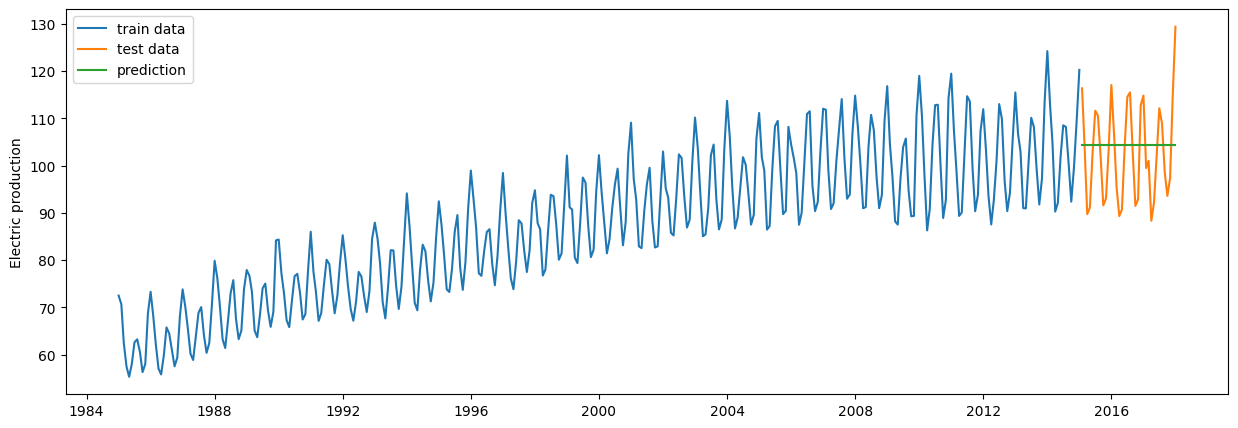

In [48]:
# time seri data KNN model using GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

# time series data to KNN:
def get_data():
        data = pd.read_csv('Electric_production.csv')
        data['DATE'] = pd.to_datetime(data['DATE'])
        data = data.set_index('DATE')
        data['Year'] = data.index.year
        data['Month'] = data.index.month
        data['Day'] = data.index.day
        return data
data = get_data()
data.head(15)

# Split data to train and test
def split_data(data, split_date):
        return data.loc[data.index <= split_date].copy(), \
                   data.loc[data.index >  split_date].copy()
train, test = split_data(data, '01-01-2015')
print(train.shape)
print(test.shape)

# KNN
def knn(train, test, n_neighbors):
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
        X = train.index.values.reshape(-1, 1)
        y = train['IPG2211A2N'].ravel()
        knn.fit(X, y)
        # Predicting
        X = test.index.values.reshape(-1, 1)
        return knn.predict(X), knn

# GridSearchCV
def grid_knn(train, test, n_neighbors):
        knn = neighbors.KNeighborsRegressor()
        parameters = {'n_neighbors': n_neighbors}
        grid = GridSearchCV(knn, parameters, cv=5, n_jobs=-1)
        X = train.index.values.reshape(-1, 1)
        y = train['IPG2211A2N'].ravel()
        grid.fit(X, y)
        # Predicting
        X = test.index.values.reshape(-1, 1)
        y_pred = grid.predict(X)
        return y_pred, grid
y_pred, grid = grid_knn(train, test, [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
print(y_pred)

# Plot
def plot_knn(y_pred, grid, train, test):
        plt.figure(figsize=(15, 5))
        plt.plot(train.index, train['IPG2211A2N'], label='train data')
        plt.plot(test.index, test['IPG2211A2N'], label='test data')
        plt.plot(test.index, y_pred, label='prediction')
        plt.ylabel('Electric production')
        plt.legend()
        plt.show()

plot_knn(y_pred, grid, train, test)






(361, 4)
(36, 4)


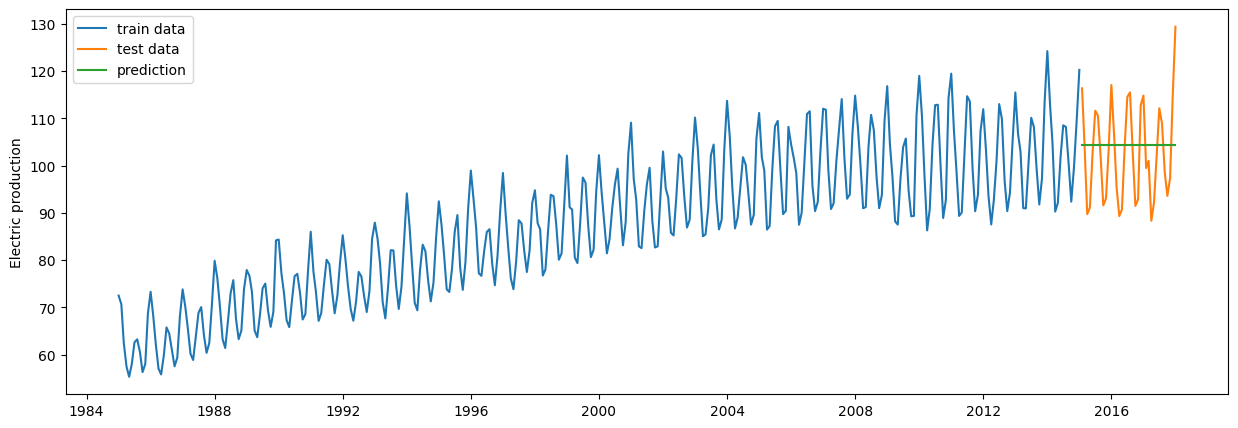

   IPG2211A2N      Year     Month       Day
1    104.4243  104.4243  104.4243  104.4243
2    104.4243  104.4243  104.4243  104.4243
3    104.4243  104.4243  104.4243  104.4243
4    104.4243  104.4243  104.4243  104.4243
5    104.4243  104.4243  104.4243  104.4243
6    104.4243  104.4243  104.4243  104.4243
7    104.4243  104.4243  104.4243  104.4243
8    104.4243  104.4243  104.4243  104.4243
9    104.4243  104.4243  104.4243  104.4243
10   104.4243  104.4243  104.4243  104.4243
11   104.4243  104.4243  104.4243  104.4243
12   104.4243  104.4243  104.4243  104.4243
13   104.4243  104.4243  104.4243  104.4243
14   104.4243  104.4243  104.4243  104.4243
15   104.4243  104.4243  104.4243  104.4243
16   104.4243  104.4243  104.4243  104.4243
17   104.4243  104.4243  104.4243  104.4243
18   104.4243  104.4243  104.4243  104.4243
19   104.4243  104.4243  104.4243  104.4243
20   104.4243  104.4243  104.4243  104.4243
21   104.4243  104.4243  104.4243  104.4243
22   104.4243  104.4243  104.424

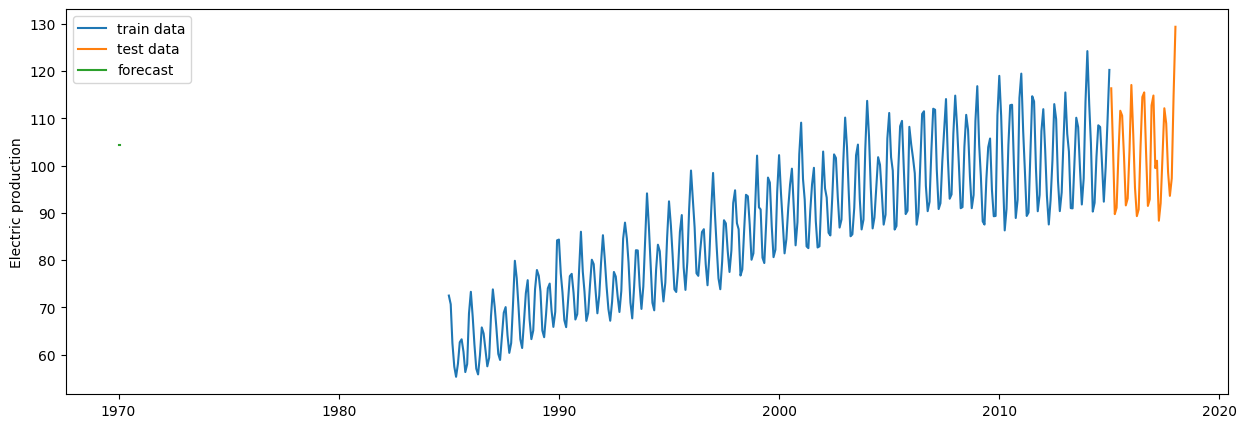

In [56]:
#KNN from time series of data and forcasting
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

# time series data to KNN:
def get_data():
        data = pd.read_csv('Electric_production.csv')
        data['DATE'] = pd.to_datetime(data['DATE'])
        data = data.set_index('DATE')
        data['Year'] = data.index.year
        data['Month'] = data.index.month
        data['Day'] = data.index.day
        return data
data = get_data()
data.head(15)

# Split data to train and test
def split_data(data, split_date):
        return data.loc[data.index <= split_date].copy(), \
                   data.loc[data.index >  split_date].copy()
train, test = split_data(data, '01-01-2015')
print(train.shape)
print(test.shape)

# KNN
def knn(train, test, n_neighbors):
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
        X = train.index.values.reshape(-1, 1)
        y = train['IPG2211A2N'].ravel()
        knn.fit(X, y)
        # Predicting
        X = test.index.values.reshape(-1, 1)
        return knn.predict(X), knn



# Plot
def plot_knn(y_pred, grid, train, test):
        plt.figure(figsize=(15, 5))
        plt.plot(train.index, train['IPG2211A2N'], label='train data')
        plt.plot(test.index, test['IPG2211A2N'], label='test data')
        plt.plot(test.index, y_pred, label='prediction')
        plt.ylabel('Electric production')
        plt.legend()
        plt.show()

plot_knn(y_pred, grid, train, test)

# Forecasting
def forecast_knn(y_pred, grid, train, test, n_steps):
        # Predicting
        X = test.index.values.reshape(-1, 1)
        y_pred = grid.predict(X)
        # Forecasting
        last_date = X.max()
        forecast = pd.DataFrame(index=range(1, n_steps+1), columns=test.columns)
        for i in range(1, n_steps+1):
            date = last_date + np.timedelta64(i, 'D')
            X = np.array(date).reshape(-1, 1)
            forecast.loc[i] = grid.predict(X)
        return forecast
forecast = forecast_knn(y_pred, grid, train, test, 30)
print(forecast)

# Plot
def plot_forecast_knn(forecast, train, test):
        plt.figure(figsize=(15, 5))
        plt.plot(train.index, train['IPG2211A2N'], label='train data')
        plt.plot(test.index, test['IPG2211A2N'], label='test data')
        plt.plot(forecast.index, forecast['IPG2211A2N'], label='forecast')
        plt.ylabel('Electric production')
        plt.legend()
        plt.show()

plot_forecast_knn(forecast, train, test)



In [54]:

#calculate RMSE, MSE, MAE, MAPE time series data for KNN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

# time series data to KNN:
def get_data():
        data = pd.read_csv('Electric_production.csv')
        data['DATE'] = pd.to_datetime(data['DATE'])
        data = data.set_index('DATE')
        data['Year'] = data.index.year
        data['Month'] = data.index.month
        data['Day'] = data.index.day
        return data
data = get_data()
data.head(15)

# Split data to train and test
def split_data(data, split_date):
        return data.loc[data.index <= split_date].copy(), \
                   data.loc[data.index >  split_date].copy()
train, test = split_data(data, '01-01-2015')
print(train.shape)
print(test.shape)

# KNN
def knn(train, test, n_neighbors):
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
        X = train.index.values.reshape(-1, 1)
        y = train['IPG2211A2N'].ravel()
        knn.fit(X, y)
        # Predicting
        X = test.index.values.reshape(-1, 1)
        return knn.predict(X), knn

#Rmse
def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

#Mse
def mse(y_true, y_pred):
        return mean_squared_error(y_true, y_pred)

#Mae
def mae(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred)))

#Mape
def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#print RMSE, MSE, MAE, MAPE
y_pred, knn = knn(train, test, 5)
print('RMSE: ', rmse(test['IPG2211A2N'], y_pred))
print('MSE: ', mse(test['IPG2211A2N'], y_pred))
print('MAE: ', mae(test['IPG2211A2N'], y_pred))
print('MAPE: ', mape(test['IPG2211A2N'], y_pred))








(361, 4)
(36, 4)
RMSE:  10.224061295066543
MSE:  104.53142936527775
MAE:  8.681841666666664
MAPE:  8.581686940262804
